In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyvisa as visa
import time
import metodos_labo as labo
plt.style.use('./informes.mplstyle')

#### Identificar generador y termocuplas

In [23]:
rm = visa.ResourceManager()
print(rm.list_resources())

multi_up = rm.open_resource('GPIB0::24::INSTR')
multi_down = rm.open_resource('GPIB0::23::INSTR')
gen = rm.open_resource('GPIB0::25::INSTR')

try:
    print(multi_up.query_ascii_values('MEASURE:VOLT:DC?')[0] * 1e3)
    print(multi_down.query_ascii_values('MEASURE:VOLT:DC?')[0] * 1e3)
    print(gen.query_ascii_values('MEASURE:VOLT:DC?')[0])
    
except:
    print('HUBO ERROR')
multi_up.close()
multi_down.close()
gen.close()

('GPIB0::23::INSTR', 'GPIB0::24::INSTR', 'GPIB0::25::INSTR')
0.045082
-0.035147
0.0029348


#### Medir tensión vs temperatura

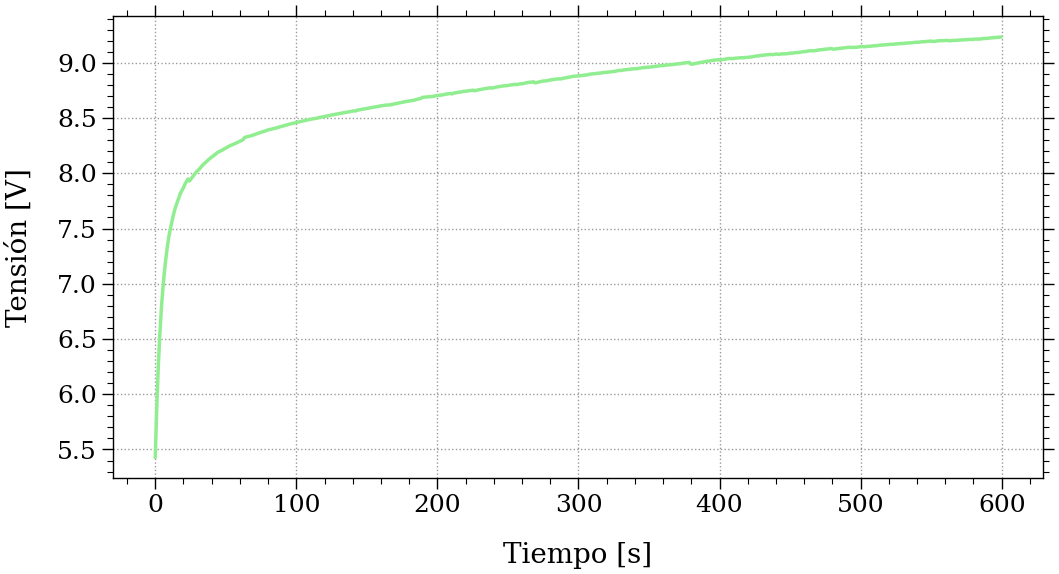

In [25]:
rm = visa.ResourceManager()
gen = rm.open_resource('GPIB0::25::INSTR')
multi_up = rm.open_resource('GPIB0::24::INSTR')
multi_down = rm.open_resource('GPIB0::23::INSTR')

try:
    
    gen.write(":SOUR:FUNC:MODE CURR")
    gen.write(":SENS:VOLT:PROT 21")
    
    # corrientes = [0.1, 0.3, 0.5, 0.75, 1, 1.25, 1.5]
    I = 1.5  # A
    duracion = 600  # s
    
    t = []
    V_gen = []
    V_termo_up = []
    V_termo_down = []
    
    gen.write(f":SOUR:CURR {I}") # Pone la corriente
    
    t0 = time.time()
    while time.time() - t0 <= duracion:
        t.append(time.time() - t0)
        V_gen.append(gen.query_ascii_values('MEASURE:VOLT:DC?')[0])
        V_termo_up.append(multi_up.query_ascii_values('MEASURE:VOLT:DC?')[0])
        V_termo_down.append(multi_down.query_ascii_values('MEASURE:VOLT:DC?')[0])
    gen.write(f":SOUR:CURR 0")
    
    
    # GUARDAR DATOS
    
    t = np.array(t)  # s
    V_gen = np.array(V_gen)  # V
    V_termo_up = np.array(V_termo_up)
    V_termo_down = np.array(V_termo_down)
    
    df = pd.DataFrame({'Tiempo [s]' : t,
                        'Tension generador [V]' : V_gen,
                        'Tensión termocupla fria [V]' : V_termo_down,
                        'Tensión termocupla caliente [V]' : V_termo_up})
    
    labo.save(df, f'celda_tvsV_I={I}', './Mediciones/Clase 3')
    
    
    # GRAFICAR
    
    fig, ax = plt.subplots()
    ax.set_ylabel('Tensión [V]')
    ax.set_xlabel('Tiempo [s]')
    
    ax.plot(t, V_gen)
    
    
    plt.show()
    
    
except:
    print('HUBO ERROR')
gen.close()
multi_down.close()
multi_up.close()

In [30]:
rm = visa.ResourceManager()
gen = rm.open_resource('GPIB0::25::INSTR')
multi_up = rm.open_resource('GPIB0::24::INSTR')
multi_down = rm.open_resource('GPIB0::23::INSTR')

try:
    duracion = 180  # s
    I = 1
    
    t = []
    V_gen = []
    V_termo_up = []
    V_termo_down = []
    
    gen.write(f":SOUR:CURR 0") # Pone la corriente
    
    t0 = time.time()
    while time.time() - t0 <= duracion:
        t.append(time.time() - t0)
        V_gen.append(gen.query_ascii_values('MEASURE:VOLT:DC?')[0])
        V_termo_up.append(multi_up.query_ascii_values('MEASURE:VOLT:DC?')[0])
        V_termo_down.append(multi_down.query_ascii_values('MEASURE:VOLT:DC?')[0])
    
    
    # GUARDAR DATOS
    
    t = np.array(t)  # s
    V_gen = np.array(V_gen)  # V
    V_termo_up = np.array(V_termo_up)
    V_termo_down = np.array(V_termo_down)
    
    df = pd.DataFrame({'Tiempo [s]' : t,
                        'Tension generador [V]' : V_gen,
                        'Tensión termocupla fria [V]' : V_termo_up,
                        'Tensión termocupla caliente [V]' : V_termo_down})
    
    labo.save(df, f'celda_temp_fija_I={I}', './Mediciones/Clase 3')

except:
    print('HUBO ERROR')
gen.close()
multi_down.close()
multi_up.close()